In [1]:
import matplotlib.pyplot as plt 
import cv2

%matplotlib inline

In [5]:
car1 = cv2.imread('CNRPark-Patches-150x150/A/busy/20150703_0805_14.jpg')

In [6]:
car1 = cv2.cvtColor(car1,cv2.COLOR_BGR2RGB)

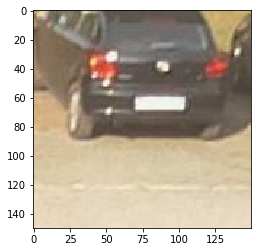

In [81]:
plt.imshow(car1)

In [8]:
car1.shape

(150, 150, 3)

In [9]:
empty = cv2.imread('CNRPark-Patches-150x150/A/free/20150703_0805_1.jpg')

In [10]:
empty = cv2.cvtColor(empty,cv2.COLOR_BGR2RGB)

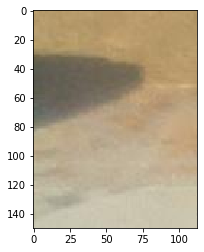

In [11]:
plt.imshow(empty)

In [12]:
empty.shape

(150, 113, 3)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [14]:
image_gene = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2, 
                               zoom_range=0.2,
                                horizontal_flip=True,
                               fill_mode='nearest')

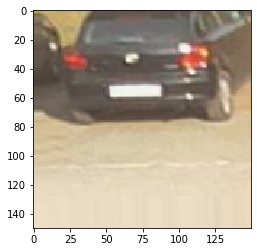

In [85]:
#plt.imshow(image_gene.random_transform(empty))
plt.imshow(image_gene.random_transform(car1))
plt.imsave('random_car_transform.jpg',image_gene.random_transform(car1))

In [18]:
image_gene.flow_from_directory('CNRPark-Patches-150x150/A')

Found 6171 images belonging to 2 classes.


In [21]:
from keras.models import Sequential 
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))

#binary class 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [74]:

training_image_gene = image_gene.flow_from_directory('CNRPark-Patches-150x150/A',target_size=(150,150),batch_size=1,
                                                    class_mode='binary')

Found 6171 images belonging to 2 classes.


In [75]:
testing_image_gene = image_gene.flow_from_directory('CNRPark-Patches-150x150/B',target_size=(150,150),batch_size=1,
                                                    class_mode='binary')

Found 6413 images belonging to 2 classes.


In [76]:
training_image_gene.class_indices

{'busy': 0, 'free': 1}

In [77]:
#change the epochs and batch size and steps per epoch 
#add steps_per_epoch 
results = model.fit_generator(training_image_gene, epochs=10,validation_data=testing_image_gene,validation_steps=1)

Epoch 1/10
6171/6171 [==============================] - 1249s 202ms/step - loss: 0.0888 - accuracy: 0.9819 - val_loss: 3.2797e-05 - val_accuracy: 1.0000
Epoch 2/10
6171/6171 [==============================] - 1068s 173ms/step - loss: 0.0516 - accuracy: 0.9875 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 3/10
6171/6171 [==============================] - 1265s 205ms/step - loss: 0.0394 - accuracy: 0.9888 - val_loss: 4.6495e-18 - val_accuracy: 1.0000
Epoch 4/10
6171/6171 [==============================] - 1268s 206ms/step - loss: 0.0462 - accuracy: 0.9865 - val_loss: 7.1780 - val_accuracy: 0.0000e+00
Epoch 5/10
6171/6171 [==============================] - 772s 125ms/step - loss: 0.0508 - accuracy: 0.9849 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 6/10
6171/6171 [==============================] - 1600s 259ms/step - loss: 0.0481 - accuracy: 0.9835 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/10
6171/6171 [==============================] - 1293s 210ms/step - loss: 0.0439 - accur

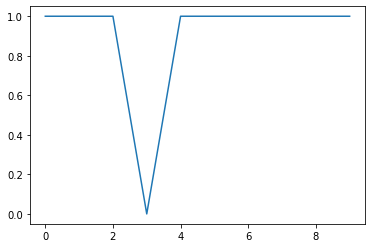

In [78]:
plt.plot(results.history['val_accuracy'])

In [80]:
model.save('freebusy.h5')

In [79]:
training_image_gene.class_indices

{'busy': 0, 'free': 1}

In [40]:
test_car_img = 'CNRPark-Patches-150x150/.jpg'

In [41]:
from keras.preprocessing import image

In [42]:
test_car_img = image.load_img(test_car_img,target_size=(150,150))

In [43]:
test_car_img = image.img_to_array(test_car_img)

In [44]:
test_car_img.shape

(150, 150, 3)

In [45]:
import numpy as np

#dont run this again
#change the selected image and run it
test_car_img = np.expand_dims(test_car_img,axis=0)

In [46]:
test_car_img.shape

(1, 150, 150, 3)

In [47]:
test_car_img.max()

252.0

In [48]:
test_car_img = test_car_img/255

In [49]:
test_car_img.max()

0.9882353

In [50]:
model.predict_classes(test_car_img)

array([[0]], dtype=int32)

In [51]:
model.predict(test_car_img)

array([[0.14194629]], dtype=float32)

In [54]:
free_image = 'CNRPark-Patches-150x150/B/free/20150708_0840_37.jpg'

In [55]:
free_image = image.load_img(free_image,target_size=(150,150))

In [57]:
free_image = image.img_to_array(free_image)

free_image.shape

(150, 150, 3)

In [58]:
free_image = np.expand_dims(free_image,axis=0)
free_image.shape

(1, 150, 150, 3)

In [59]:
free_image.max()

228.0

In [60]:
free_image=free_image/255

In [61]:
free_image.max()

0.89411765

In [62]:
training_image_gene.class_indices

{'busy': 0, 'free': 1}

In [63]:
model.predict_classes(free_image)

array([[1]], dtype=int32)

In [64]:
model.predict(free_image)

array([[0.9421781]], dtype=float32)